## PCA 

In [3]:
import numpy as np
import pandas as pd
from PIL import Image

# create an empty NumPy array to store the pixel values of the images
pixel_values = np.zeros((9, 640*480))

# define a loop to read each image, convert it to grayscale, resize it to 28x28, flatten it to a 1D array of length 784, and store the pixel values in the NumPy array
for i in range(9):
    # read the image
    img = Image.open(f'image{i}.jpg')
    # convert to grayscale
    img = img.convert('L')
    # resize to 28x28
    img = img.resize((640, 480))
    # flatten to 1D array
    pixels = np.array(img).flatten()
    # store in NumPy array
    pixel_values[i] = pixels

# create a Pandas DataFrame from the NumPy array, and save it to a CSV file
df = pd.DataFrame(pixel_values)
df.to_csv('pixel_values.csv', index=False)


In [4]:
import pandas as pd
mnist = pd.read_csv('pixel_values.csv')
mnist.head()

,0,1,2,3,4,5,6,7,8,9,...,307190,307191,307192,307193,307194,307195,307196,307197,307198,307199
0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,3.0,3.0,4.0,4.0,4.0,3.0,3.0,2.0,2.0,2.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,5.0,4.0,8.0,7.0,6.0,5.0,4.0,3.0,4.0,4.0
3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,...,4.0,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


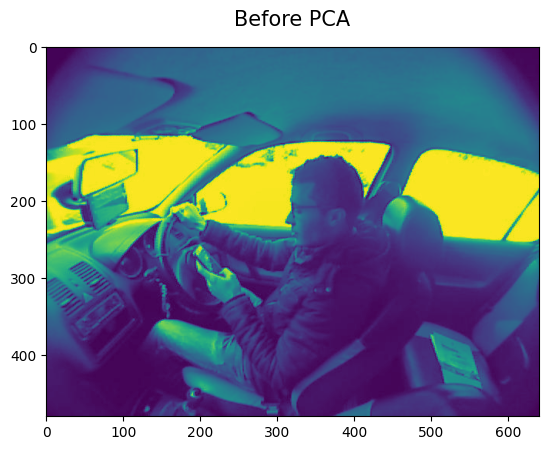

In [7]:
import matplotlib.pyplot as plt

second_image = mnist.iloc[3].values.reshape([480,640])
plt.imshow(second_image)
plt.title('Before PCA', fontsize=15, pad=15)
plt.savefig("beforepca.png")

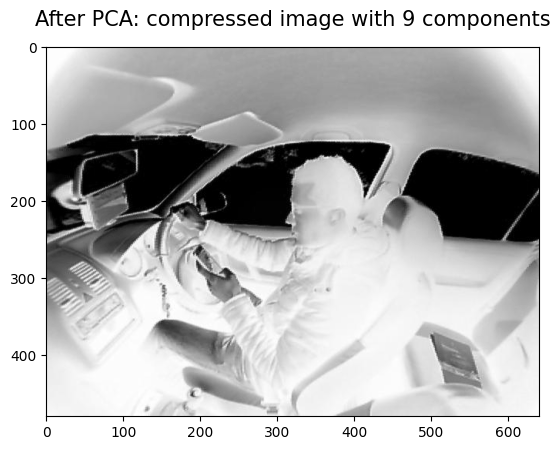

In [10]:
from sklearn.decomposition import PCA
pca_10 = PCA(n_components=9)
mnist_pca_10_reduced = pca_10.fit_transform(mnist)
mnist_pca_10_recovered = pca_10.inverse_transform(mnist_pca_10_reduced)

image_pca_10 = mnist_pca_10_recovered[3,:].reshape([480,640])
plt.imshow(image_pca_10, cmap='gray_r')
plt.title('After PCA: compressed image with 9 components', fontsize=15, pad=15)
plt.savefig("afterpca.png")

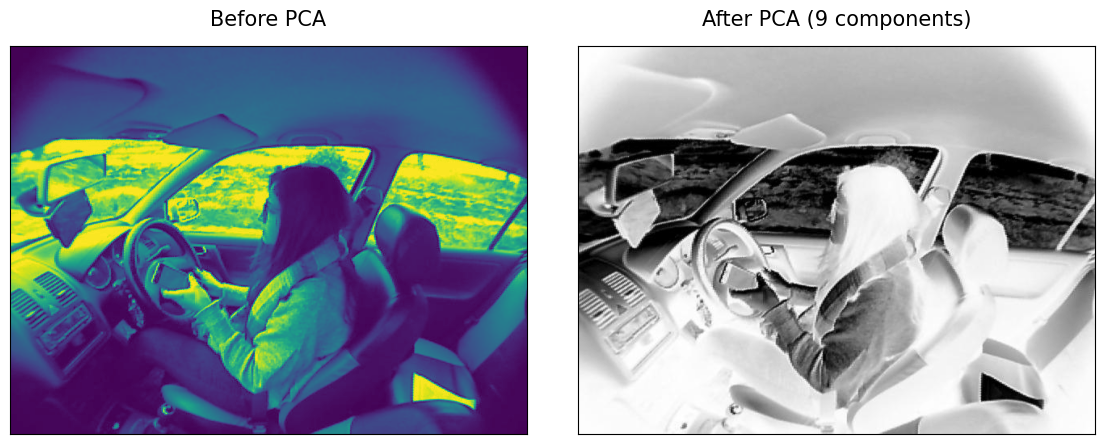

In [32]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the images and perform PCA
second_image = mnist.iloc[1].values.reshape([480,640])
pca_10 = PCA(n_components=9)
mnist_pca_10_reduced = pca_10.fit_transform(mnist)
mnist_pca_10_recovered = pca_10.inverse_transform(mnist_pca_10_reduced)
image_pca_10 = mnist_pca_10_recovered[1,:].reshape([480,640])

# Create a figure with two subplots, arranged side-by-side
fig, axs = plt.subplots(1, 2, figsize=(14, 8))

# Display the original image in the left subplot
axs[0].imshow(second_image)
axs[0].set_title('Before PCA', fontsize=15, pad=15)

# Display the compressed image in the right subplot
axs[1].imshow(image_pca_10, cmap='gray_r')
axs[1].set_title('After PCA (9 components)', fontsize=15, pad=15)

# Remove the ticks and labels from both subplots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.1)
plt.savefig("pca-1.png")
# Show the figure
plt.show()

## Data Resizing

2023-04-17 11:42:11.055571: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Metal device set to: Apple M1


2023-04-17 11:42:13.103961: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-17 11:42:13.104661: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


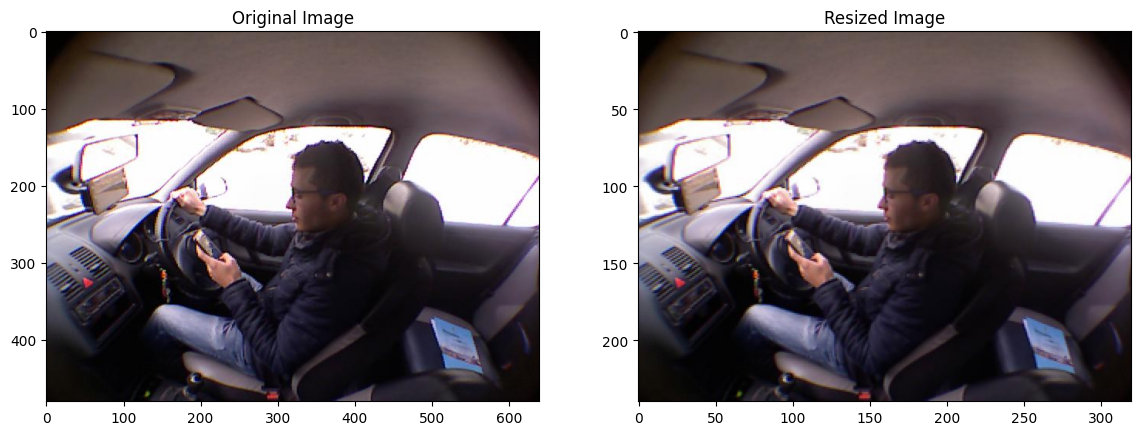

In [11]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Load the original image
img = keras.preprocessing.image.load_img('image3.jpg')

# Convert the image to a numpy array
img_array = keras.preprocessing.image.img_to_array(img)

# Show the original image
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)

plt.imshow(img_array.astype(int))
plt.title('Original Image')

# Resize the image to half its original size
resized_img = tf.image.resize(img_array, [int(img_array.shape[0]/2), int(img_array.shape[1]/2)])

# Show the resized image
plt.subplot(1, 2, 2)
plt.imshow(resized_img.numpy().astype(int))
plt.title('Resized Image')

plt.savefig("resize-1.png")
# Show the figure
plt.show()

## Augmentation 

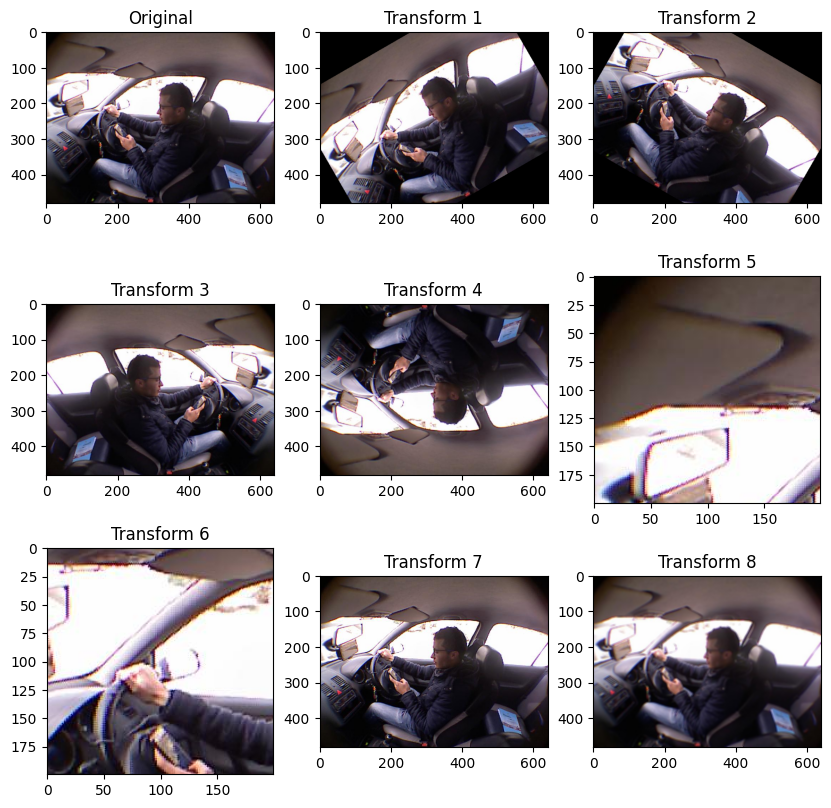

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageFilter

# load the image
img = Image.open('image3.jpg')

# define the transformations
transforms = [
    lambda x: x.rotate(30),
    lambda x: x.rotate(-30),
    lambda x: x.transpose(Image.FLIP_LEFT_RIGHT),
    lambda x: x.transpose(Image.FLIP_TOP_BOTTOM),
    lambda x: x.crop((0, 0, 200, 200)),
    lambda x: x.crop((100, 100, 300, 300)),
    lambda x: x.filter(ImageFilter.SHARPEN),
    lambda x: x.filter(ImageFilter.BLUR)
]

# apply the transformations to generate new images
new_imgs = []
for transform in transforms:
    new_img = transform(img)
    new_imgs.append(new_img)

# display the original image and the new images together
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
axes[0][0].imshow(img)
axes[0][0].set_title('Original')
for i, ax in enumerate(axes.flatten()[1:]):
    ax.imshow(new_imgs[i])
    ax.set_title(f'Transform {i+1}')
    
plt.savefig("augmentation-1.jpg")
plt.show()

## Normalization and Standardilization 

In [46]:
import pandas as pd

# load the CSV file
df = pd.read_csv('pixel_values.csv')

# extract the pixel values as a numpy array
pixels = df.iloc[:, 1:].values

# normalize the pixel values to a range of 0 to 1
pixels_norm = pixels / 255.0

# standardize the pixel values to have zero mean and unit variance
pixels_std = (pixels - pixels.mean()) / pixels.std()

# add the pixel values back to the DataFrame
df_norm = pd.concat([df.iloc[:, 0], pd.DataFrame(pixels_norm)], axis=1)
df_std = pd.concat([df.iloc[:, 0], pd.DataFrame(pixels_std)], axis=1)

# save the normalized and standardized data to new CSV files
df_norm.to_csv('image_data_norm.csv', index=False)
df_std.to_csv('image_data_std.csv', index=False)

Text(0.5, 1.0, 'Original Image')

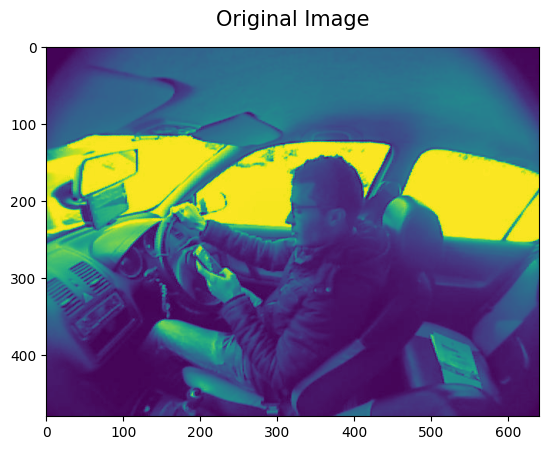

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
o = pd.read_csv('pixel_values.csv')
o2 = o.iloc[3].values.reshape([480,640])
plt.imshow(o2)
plt.title('Original Image', fontsize=15, pad=15)

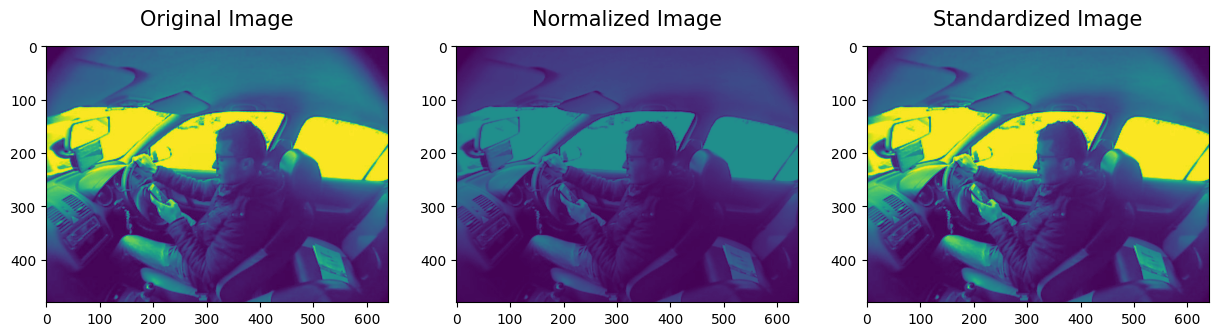

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the original image from the pixel_values.csv file
o = pd.read_csv('pixel_values.csv')
o2 = o.iloc[3].values.reshape([480,640])

# Load the normalized image from the image_data_norm.csv file
n = pd.read_csv('image_data_norm.csv')
n2 = n.iloc[3].values.reshape([480,640])

# Load the standardized image from the image_data_std.csv file
s = pd.read_csv('image_data_std.csv')
s2 = s.iloc[3].values.reshape([480,640])

# Create a figure with three subplots arranged horizontally
fig, axs = plt.subplots(1, 3, figsize=(15,5))

# Display the original image in the first subplot
axs[0].imshow(o2)
axs[0].set_title('Original Image', fontsize=15, pad=15)

# Display the normalized image in the second subplot
axs[1].imshow(n2)
axs[1].set_title('Normalized Image', fontsize=15, pad=15)

# Display the standardized image in the third subplot
axs[2].imshow(s2)
axs[2].set_title('Standardized Image', fontsize=15, pad=15)

# Show the plot
plt.savefig("Norm-std-1")
plt.show()